# <font color=green>Axiata Assessment </font> 


### Challenge Chosen for the Assessment "Warm Up: Predict Blood Donations"

####                                                                               Uzair Aslam

#### Question:: Can you predict whether a donor will return to donate blood given their donation history?

As per the instructions, the task is to predict whether a donor will give blood the next time the Blood Donation van Comes to the campus. First things first i need to load the data and explore it

### <font color=green>Importing Libraries and Data Loading</font> 

#### Importing Libraries for Data exploration and Visualization

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display

In [175]:
TransTrain= pd.read_csv('training_data.csv')
TransTest=pd.read_csv('test_data.csv')

#### The task was about a Blood donation mobile Van in Taiwan that visits a university campus each month. The task was to determine whether one can predict based on past data if a customer or donor would donate blood on march of 2007. 

## <font color=green>Flow Chart</font>

![title](img/2019.png)

### <font color=green>Data Exploration</font>

##### Lets take a look at what the training data looks like

In [176]:
display(TransTrain.head())

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


The First column is the ID column, i would've Removed it if it was not required for submission along with Predicted Values. Therefore, i will change it's name To Client Id

In [177]:
TransTrain.rename(columns={'Unnamed: 0':'Client_ID'}, inplace=True)
TransTest.rename(columns={'Unnamed: 0':'Client_ID'}, inplace=True)

In [178]:
print(TransTrain.shape)
print(TransTest.shape)

(576, 6)
(200, 5)


So the Training data has 576 observations in total and testing set is smaller in size with 200 observations. lets see if there are any missing values in the dataset

In [179]:
TransTrain.isnull().sum()

Client_ID                      0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

In [180]:
TransTest.isnull().sum()

Client_ID                      0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
dtype: int64

Apparently there are no missing values, lets explore further and see what are the data types for each Variable

In [181]:
print(TransTrain.dtypes)

Client_ID                      int64
Months since Last Donation     int64
Number of Donations            int64
Total Volume Donated (c.c.)    int64
Months since First Donation    int64
Made Donation in March 2007    int64
dtype: object


### <font color=green>Descriptive Statistics </font>

The data seems to be clean and does not contain any missing values, this is good news as i dont need to worry about data cleaning. However, i need to check if my data has any outliers that need to be treated 

In [182]:
TransTrain.describe()

,Client_ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


Ok so the descriptive statics of my training data shows a much clearer picture of the data. I can see that many of my variables have outliers for example in the case of " Number of donations" the min and max values are 1 and 50 respectively but the mean is quite low at 5.42. This means that the max value is that of an outlier. I will need to treat these. Similar cases for other variables as well as "Months since Last Donation" has min and max values 0 and 74 but mean is again quite low at 9.439. These outliers need to be handled before moving forward to modeling

I want to see how my variables are correlated first i will use Pairplot from seaborn library to see the distribution of each variable

C:\Users\uzair\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\uzair\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\uzair\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


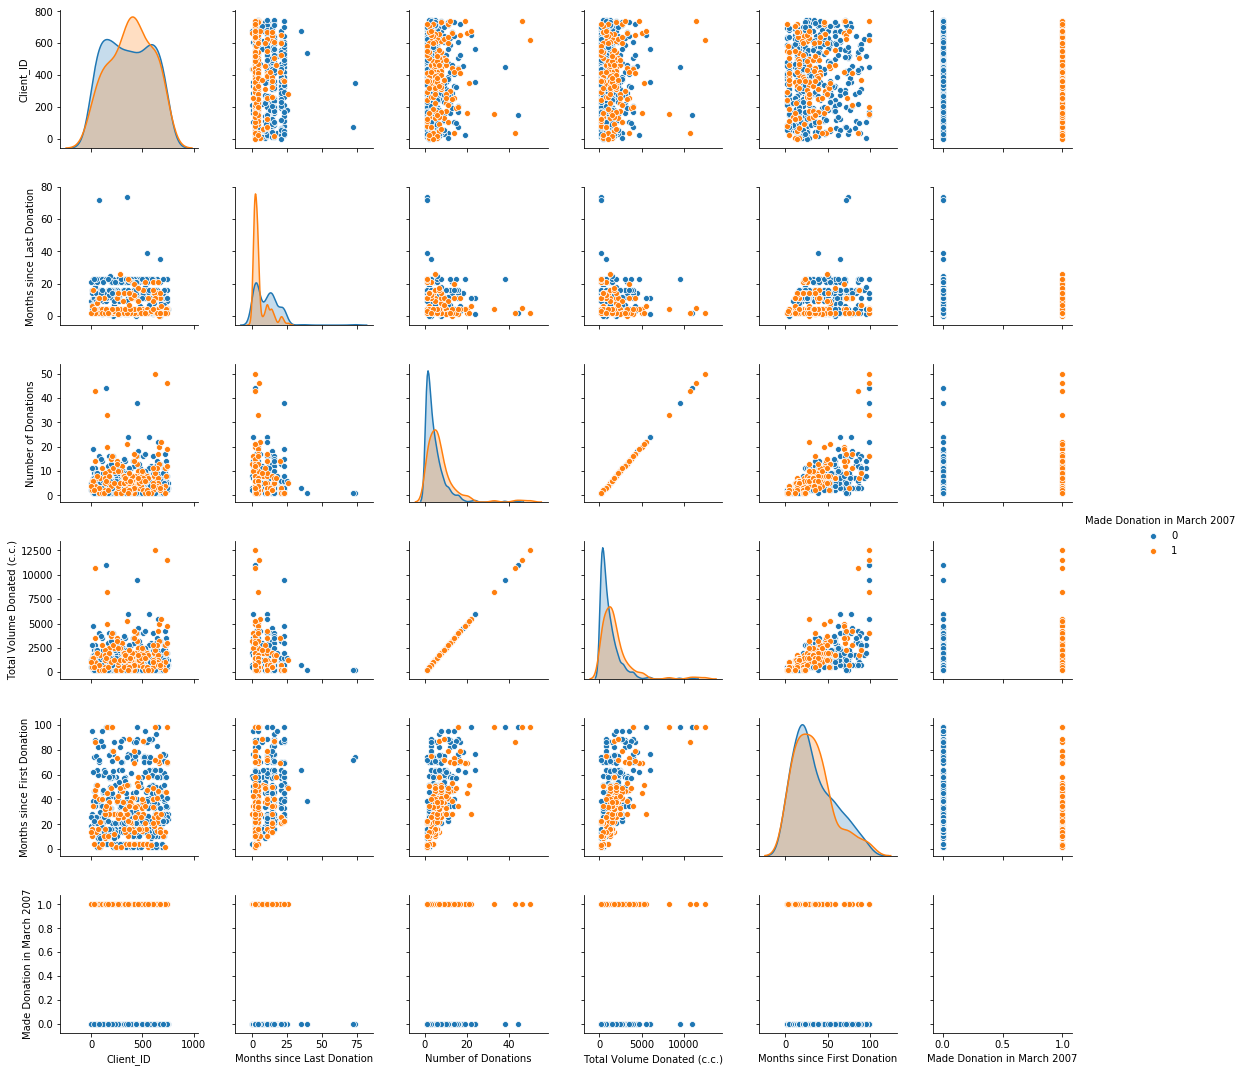

In [183]:
sns.pairplot(TransTrain, diag_kind='kde',hue='Made Donation in March 2007')
plt.show()

From the above plot alot of things become clear, we can clearly see that first of all the target variable has only 1 and 0 values and there are no ambiguities in it. We can also see that two variables seem to be highly correlated with eachother as they seem to have highly linear relation. These are Number of Donations and Total Volume donated. This is not surprising as the total volume donated is directly proportional to how many times a customer donated blood. However, since both these are correlated this may cause a problem during model building. I will need to remove one of them but i need to be sure of this. For this i will create a heat map


Furthermore, the pairplot also confirms the existance of outliers in multiple variables

#### Are any of the variables highly correlated with eachother?

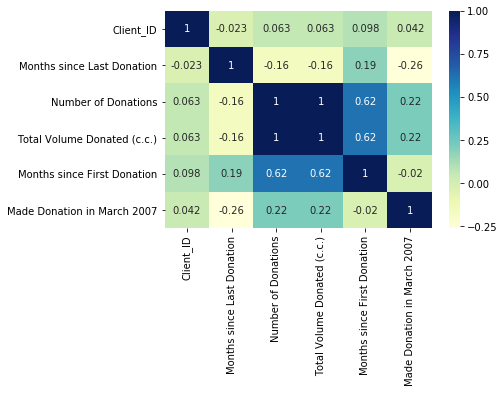

In [184]:
corr = TransTrain.corr()
# Correlation Plot for the independent variables
sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")

The above heat map clearly shows that the two variables are highly correlated with each other


I still need to make sure that my Target Variable doesnt contain any ambigous values or whether there exists any sort of class imbalance in my Target Variable

#### What is the Distribution of Target Variable?

In [185]:
TransTrain['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

This shows that my data is imbalanced, let's plot it to see a clear picture

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E255B25470>],
      dtype=object)

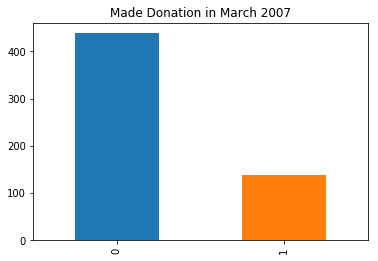

In [186]:
TransTrain['Made Donation in March 2007'].value_counts().plot(kind='bar', subplots=True)

People who have donated in March 2007 is 4 times less than those who havent donated blood

### <font color=green>Feature Engineering and Feature Selection</font>

Before i get rid of the correlated features, i will create some additional variables. Lets Create a Feature for who are Frequent Donors, we can extract this information from the number of donations feature. Since the mean of Number of Donations is 5. We will create a new categorical feature of whether a donor is frequenct donor or not if they have donated more then 5 times. 

In [187]:
TransTrain['Frequenct Donor'] = (TransTrain['Number of Donations'] >= 5)
TransTest['Frequenct Donor'] = (TransTest['Number of Donations'] >= 5)
display(TransTrain.head())

,Client_ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007,Frequenct Donor
0,619,2,50,12500,98,1,True
1,664,0,13,3250,28,1,True
2,441,1,16,4000,35,1,True
3,160,2,20,5000,45,1,True
4,358,1,24,6000,77,0,True


I will create another feature to see how long does a donor wait from their last donation to donate blood again. For this i can simply subtract Last month donations from First month donations and divide them by number of donations

In [188]:
TransTrain['Donation Frequency'] = ((TransTrain['Months since First Donation'] - TransTrain['Months since Last Donation'])
                           /TransTrain['Number of Donations'])
TransTest['Donation Frequency'] = ((TransTest['Months since First Donation'] - TransTest['Months since Last Donation'])
                           /TransTest['Number of Donations'])
display(TransTrain.head(15))

,Client_ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007,Frequenct Donor,Donation Frequency
0,619,2,50,12500,98,1,True,1.920000
1,664,0,13,3250,28,1,True,2.153846
2,441,1,16,4000,35,1,True,2.125000
3,160,2,20,5000,45,1,True,2.150000
4,358,1,24,6000,77,0,True,3.166667
5,335,4,4,1000,4,0,False,0.000000
6,47,2,7,1750,14,1,True,1.714286
7,164,1,12,3000,35,0,True,2.833333
8,736,5,46,11500,98,1,True,2.021739
9,436,0,3,750,4,0,False,1.333333


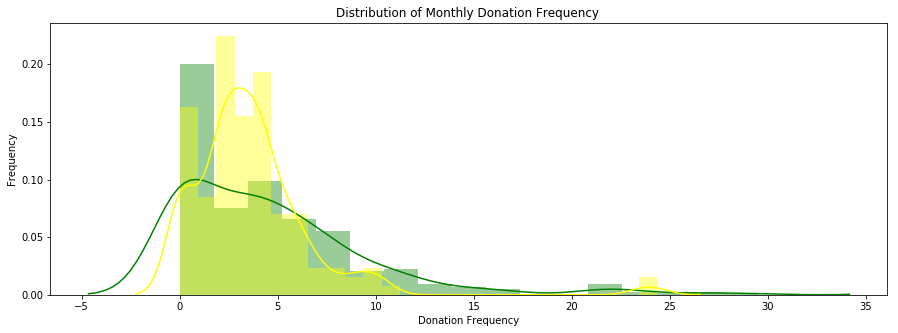

In [189]:
plt.figure(figsize = (15, 5))

sns.distplot(TransTrain[TransTrain['Made Donation in March 2007'].values == 0]['Donation Frequency'], color = 'Green')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Donation Frequency')

sns.distplot(TransTrain[TransTrain['Made Donation in March 2007'].values == 1]['Donation Frequency'], color = 'yellow')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Donation Frequency ')

plt.show()

From the above plot we can see that Frequent donors are more likely to donate blood again. However there are many 0 values in the Donation frequency feature which means that these clients only donated blood once and never donated again.

We have our additional Features, i will remove Total volume from the dataset now

In [190]:
TransTrain.drop(['Total Volume Donated (c.c.)'], axis=1, inplace=True)
TransTest.drop(['Total Volume Donated (c.c.)'], axis=1, inplace=True)

Lets check the correlation matrix magain for our newly added features

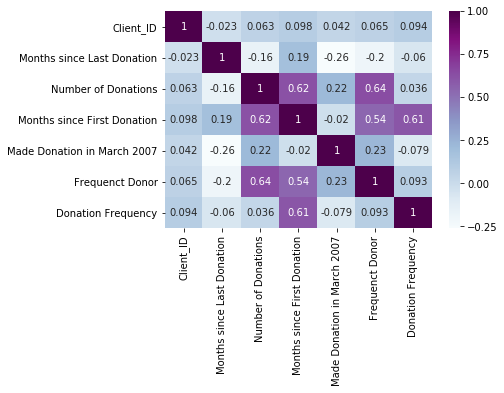

In [191]:
corr = TransTrain.corr()
# Correlation Plot for the independent variables
sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="BuPu")

Before i move on to anything else i need to Encode the categorical features to their respective numeric values for modeling.

In [192]:
TransTrain['Frequenct Donor'] = TransTrain['Frequenct Donor'].astype('category')
TransTest['Frequenct Donor'] = TransTest['Frequenct Donor'].astype('category')


In [193]:
TransTrain['Frequenct Donor'] = TransTrain['Frequenct Donor'].cat.codes
TransTest['Frequenct Donor'] = TransTest['Frequenct Donor'].cat.codes

In [194]:
display(TransTrain.head())

,Client_ID,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007,Frequenct Donor,Donation Frequency
0,619,2,50,98,1,1,1.920000
1,664,0,13,28,1,1,2.153846
2,441,1,16,35,1,1,2.125000
3,160,2,20,45,1,1,2.150000
4,358,1,24,77,0,1,3.166667


### <font color=green>Splitting into Training and Validation Set</font>

In [195]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [196]:
X= TransTrain.drop(['Made Donation in March 2007'],axis=1)
Y= pd.DataFrame(TransTrain['Made Donation in March 2007'])
x_test=TransTest

In [197]:
x_train, x_val, y_train, y_val = train_test_split(X, Y,
                                                  test_size = .1,
                                                  random_state=12)

### <font color=green>Handling Class Imbalance Using Smote</font>

Now that we have split the data into training and validation set, lets handle the class imbalance using smote

In [198]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.values.ravel()) # using .values.ravel() because otherwise it gives an error

### <font color=green>Modelling</font>

In [199]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

Now i define a function that will print out a confusion matrix, Although the challenge requires the evalutaion matrics to be Log loss, i want to check the recall and accuracy of the model as well

In [200]:
""""Defining A function for model evaulatin"""
def model1(mod, model_name, x_train, y_train, x_test, y_test):
    mod.fit(x_train_res, y_train_res)
    print(model_name)
    acc = cross_val_score(mod, x_train_res, y_train_res, scoring = "neg_log_loss", cv = 5)
    predictions = cross_val_predict(mod, x_train_res, y_train_res, cv = 5)
    print("Log Loss:", log_loss(y_val, y_val_lr))
    cm = confusion_matrix(predictions, y_train_res)
    print("Confusion Matrix:  \n", cm)
    print("                    Classification Report \n",classification_report(predictions, y_train_res))

#### <font color=green>Logistic Regression</font>

In [201]:
LR=LogisticRegressionCV(max_iter=1000,scoring='neg_log_loss')

In [202]:
model1(LR,"Logistic Regression",x_train_res,y_train_res,x_val,y_val)
y_val_lr = LR.predict_proba(x_val)[:, 1]

Logistic Regression
Log Loss: 0.5412535751767822
Confusion Matrix:  
 [[258 101]
 [138 295]]
                    Classification Report 
              precision    recall  f1-score   support

          0       0.65      0.72      0.68       359
          1       0.74      0.68      0.71       433

avg / total       0.70      0.70      0.70       792



We can see that the recall for our Logit model is 68 percent for correctly predicting Blood donors, though we would like to see how it performs in terms of Log loss as well and we can see that Log loss is 0.541 Which seems quite less.. The lesser the better. 